# Master's Thesis
### Using NLP on Educational Reform Policies to Predict Educational Outcome

#### Import Statements

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np

#### Additional Settings

In [27]:
pd.set_option('display.max_columns', None) 
sns.set(style="whitegrid")

#### Import Dataset

In [28]:
werd_df = pd.read_csv('../Data/World Education Reform Database/werd_v2_translated.csv')

In [29]:
werd_df.head()

,reform_id,country_code,country_name,reporting_entity,year,reform_title,reform_description,reform_description_translated
0,9,AFG,Afghanistan,Afghanistan,1904.0,Establishment of modern education system,Since the establishment of the modern educatio...,Since the establishment of the modern educatio...
1,10,AFG,Afghanistan,Afghanistan,1973.0,Structure of general education changed,After the creation of the Republic of Afghanis...,After the creation of the Republic of Afghanis...
2,5,AFG,Afghanistan,Afghanistan,1978.0,Multi-language textbooks,"After the events of 1978, school textbooks and...","After the events of 1978, school textbooks and..."
3,3,AFG,Afghanistan,Afghanistan,1979.0,Structure of general education changed,"In 1979, the pattern became 4:3:3.","In 1979, the pattern became 4:3:3."
4,11,AFG,Afghanistan,Afghanistan,1980.0,Expansion of teacher training schools,Given that the training of qualified teachers ...,Given that the training of qualified teachers ...


In [30]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10955 entries, 0 to 10954
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reform_id                      10955 non-null  int64  
 1   country_code                   10880 non-null  object 
 2   country_name                   10955 non-null  object 
 3   reporting_entity               10955 non-null  object 
 4   year                           10237 non-null  float64
 5   reform_title                   10954 non-null  object 
 6   reform_description             10955 non-null  object 
 7   reform_description_translated  10955 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 684.8+ KB


In [31]:
werd_df.describe()

,reform_id,year
count,10955.000000,10237.000000
mean,6920.089366,1996.343362
std,3959.068443,25.232626
min,1.000000,1560.000000
25%,3641.500000,1991.000000
50%,6786.000000,2003.000000
75%,10305.000000,2010.000000
max,13765.000000,2021.000000


In [32]:
werd_df.isnull().sum()

reform_id                          0
country_code                      75
country_name                       0
reporting_entity                   0
year                             718
reform_title                       1
reform_description                 0
reform_description_translated      0
dtype: int64

In [33]:
pisa_df = pd.read_csv('..\Data\PISA Scores\PISA_Scores_2000_2022.csv')

In [34]:
pisa_df.head()

,no,country_name,2000_Reading,2000_Mathematics,2000_Science,2003_Reading,2003_Mathematics,2003_Science,2006_Reading,2006_Mathematics,2006_Science,2009_Reading,2009_Mathematics,2009_Science,2012_Reading,2012_Mathematics,2012_Science,2015_Reading,2015_Mathematics,2015_Science,2018_Reading,2018_Mathematics,2018_Science,2022_Reading,2022_Mathematics,2022_Science
0,1,Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526.0,562.0,542.0,542.0,573.0,551.0,535.0,564.0,556.0,549.0,569.0,551.0,543.0,575.0,561.0
1,2,Japan,522.0,557.0,550.0,498.0,534.0,548.0,498.0,523.0,531.0,520.0,529.0,539.0,538.0,536.0,547.0,516.0,532.0,538.0,504.0,527.0,529.0,516.0,536.0,547.0
2,3,Macao (China),NaN,NaN,NaN,NaN,527.0,525.0,492.0,525.0,511.0,487.0,525.0,511.0,509.0,538.0,521.0,509.0,544.0,529.0,525.0,558.0,544.0,510.0,552.0,543.0
3,4,Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,496.0,549.0,532.0,495.0,543.0,520.0,523.0,560.0,523.0,497.0,542.0,532.0,503.0,531.0,516.0,515.0,547.0,537.0
4,5,Korea,525.0,547.0,552.0,534.0,542.0,538.0,556.0,547.0,522.0,539.0,546.0,538.0,536.0,554.0,538.0,517.0,524.0,516.0,514.0,526.0,519.0,527.0,527.0,528.0


In [35]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                95 non-null     int64  
 1   country_name      95 non-null     object 
 2   2000_Reading      39 non-null     float64
 3   2000_Mathematics  40 non-null     float64
 4   2000_Science      41 non-null     float64
 5   2003_Reading      38 non-null     float64
 6   2003_Mathematics  39 non-null     float64
 7   2003_Science      38 non-null     float64
 8   2006_Reading      56 non-null     float64
 9   2006_Mathematics  57 non-null     float64
 10  2006_Science      57 non-null     float64
 11  2009_Reading      73 non-null     float64
 12  2009_Mathematics  73 non-null     float64
 13  2009_Science      73 non-null     float64
 14  2012_Reading      65 non-null     float64
 15  2012_Mathematics  65 non-null     float64
 16  2012_Science      65 non-null     float64
 17 

In [36]:
pisa_df.describe()

,no,2000_Reading,2000_Mathematics,2000_Science,2003_Reading,2003_Mathematics,2003_Science,2006_Reading,2006_Mathematics,2006_Science,2009_Reading,2009_Mathematics,2009_Science,2012_Reading,2012_Mathematics,2012_Science,2015_Reading,2015_Mathematics,2015_Science,2018_Reading,2018_Mathematics,2018_Science,2022_Reading,2022_Mathematics,2022_Science
count,95.000000,39.000000,40.00000,41.000000,38.000000,39.000000,38.000000,56.000000,57.000000,57.000000,73.000000,73.000000,73.000000,65.000000,65.000000,65.000000,70.000000,70.000000,70.000000,78.000000,78.000000,78.000000,81.000000,81.000000,81.000000
mean,48.000000,473.512821,470.25000,474.243902,481.131579,485.615385,488.078947,459.517857,469.017544,473.140351,457.109589,459.958904,464.452055,473.984615,473.338462,478.569231,461.557143,461.614286,467.685714,453.384615,458.628205,457.935897,435.382716,437.444444,446.839506
std,27.568098,54.571475,64.90812,53.022533,41.327415,52.800825,42.797058,57.837387,59.274932,54.581014,53.868812,61.144055,57.700385,47.095811,55.494165,50.684678,51.092311,55.121024,52.308600,52.837470,56.390823,51.888327,56.055233,58.482476,55.774873
min,1.000000,327.000000,292.00000,333.000000,375.000000,356.000000,385.000000,285.000000,311.000000,322.000000,314.000000,331.000000,330.000000,384.000000,368.000000,373.000000,347.000000,328.000000,332.000000,340.000000,325.000000,336.000000,329.000000,336.000000,347.000000
25%,24.500000,446.500000,432.75000,443.000000,473.000000,467.000000,481.500000,412.250000,424.000000,428.000000,414.000000,409.000000,416.000000,441.000000,432.000000,439.000000,427.000000,417.250000,425.000000,412.250000,417.250000,417.500000,386.000000,389.000000,403.000000
50%,48.000000,492.000000,489.00000,487.000000,491.500000,503.000000,495.000000,479.000000,490.000000,489.000000,474.000000,477.000000,486.000000,488.000000,484.000000,494.000000,481.500000,478.500000,476.000000,468.000000,468.000000,468.000000,438.000000,441.000000,447.000000
75%,71.500000,511.500000,517.75000,512.000000,507.000000,523.500000,517.500000,498.250000,513.000000,513.000000,497.000000,503.000000,508.000000,509.000000,511.000000,521.000000,499.750000,503.500000,508.250000,497.250000,500.000000,498.500000,480.000000,483.000000,494.000000
max,95.000000,546.000000,560.00000,552.000000,543.000000,550.000000,548.000000,556.000000,549.000000,563.000000,556.000000,600.000000,575.000000,570.000000,613.000000,580.000000,535.000000,564.000000,601.000000,555.000000,591.000000,590.000000,543.000000,575.000000,561.000000


In [37]:
pisa_df.isnull().sum()

no                   0
country_name         0
2000_Reading        56
2000_Mathematics    55
2000_Science        54
2003_Reading        57
2003_Mathematics    56
2003_Science        57
2006_Reading        39
2006_Mathematics    38
2006_Science        38
2009_Reading        22
2009_Mathematics    22
2009_Science        22
2012_Reading        30
2012_Mathematics    30
2012_Science        30
2015_Reading        25
2015_Mathematics    25
2015_Science        25
2018_Reading        17
2018_Mathematics    17
2018_Science        17
2022_Reading        14
2022_Mathematics    14
2022_Science        14
dtype: int64

### Exploratory Data Analysis (EDA)

##### Distribution of years of Educational Reforms

##### Policies before 1900

In [38]:
# Calculate the total number of policies and the number before 1900
total_policies = werd_df['year'].count()
pre_1900_policies = werd_df[werd_df['year'] < 1900]['year'].count()
pre_1900_percentage = (pre_1900_policies / total_policies) * 100

print("Total Policies:", total_policies)
print("Policies Before 1900:", pre_1900_policies)
print("Percentage of Policies Before 1900: {:.2f}%".format(pre_1900_percentage))

Total Policies: 10237
Policies Before 1900: 144
Percentage of Policies Before 1900: 1.41%


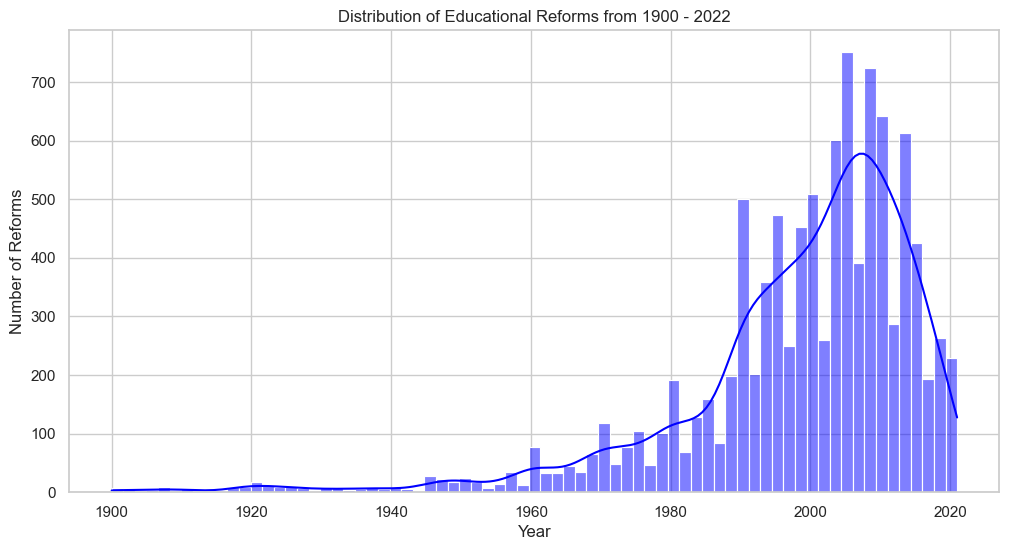

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to include only reforms from 1900 onwards
recent_reforms = werd_df[werd_df['year'] >= 1900]

plt.figure(figsize=(12, 6))
sns.histplot(recent_reforms['year'], kde=True, color='blue')
plt.title('Distribution of Educational Reforms from 1900 - 2022')
plt.xlabel('Year')
plt.ylabel('Number of Reforms')
plt.grid(True)
plt.show()

##### Finding common words and themes

C:\Users\kenan\AppData\Local\Temp\ipykernel_19492\2797895755.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')


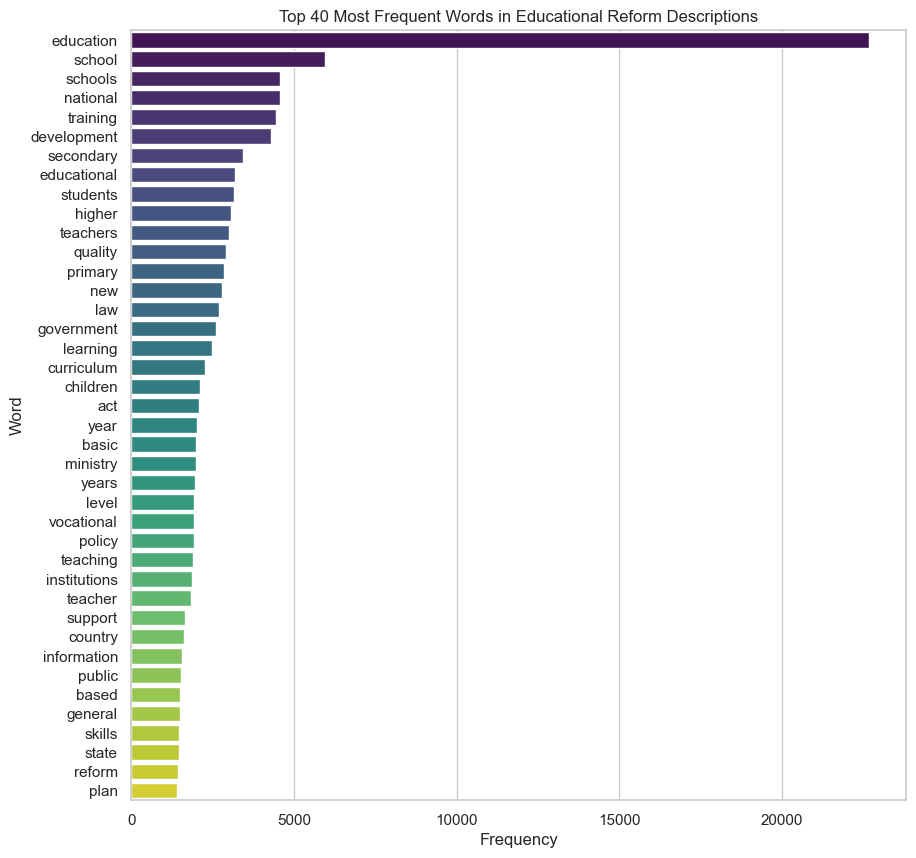

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the text data for word frequency analysis
text_data = werd_df['reform_description_translated']

# Set up the CountVectorizer to analyze the top 20 most common words
vectorizer = CountVectorizer(stop_words='english', max_features=40)
word_counts = vectorizer.fit_transform(text_data)
sum_words = word_counts.sum(axis=0)

# Create a dictionary containing word frequencies and sort it
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for plotting
words_df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(10, 10))
sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')
plt.title('Top 40 Most Frequent Words in Educational Reform Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

##### Cross Tabulation of Reforms by Country and Time Period

In [41]:
import pandas as pd

# Filter the data to include only years from 1900 onwards
werd_data_filtered = werd_df[werd_df['year'] >= 1900]

# Creating a new column for decade
werd_data_filtered['Decade'] = (werd_data_filtered['year'] // 10) * 10

# Cross-tabulation of reforms by country and decade
reforms_by_country_decade = pd.crosstab(werd_data_filtered['country_name'], werd_data_filtered['Decade'])

# Pretty printing the output
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(reforms_by_country_decade)

Decade                    1900.0  1910.0  1920.0  1930.0  1940.0  1950.0  \
country_name                                                               
Afghanistan                    1       0       0       0       0       0   
Albania                        0       0       1       0       2       0   
Algeria                        0       0       0       0       0       0   
Andorra                        0       0       0       0       0       0   
Angola                         0       0       0       0       0       0   
Argentina                      0       0       0       0       0       1   
Armenia                        0       0       0       0       0       0   
Australia                      0       0       0       1       0       0   
Austria                        0       0       1       1       0       1   
Azerbaijan                     0       0       0       0       0       0   
Bahrain                        0       0       0       0       0       0   
Bangladesh  

C:\Users\kenan\AppData\Local\Temp\ipykernel_19492\3424272365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  werd_data_filtered['Decade'] = (werd_data_filtered['year'] // 10) * 10


### Distribution of PISA Scores over the years

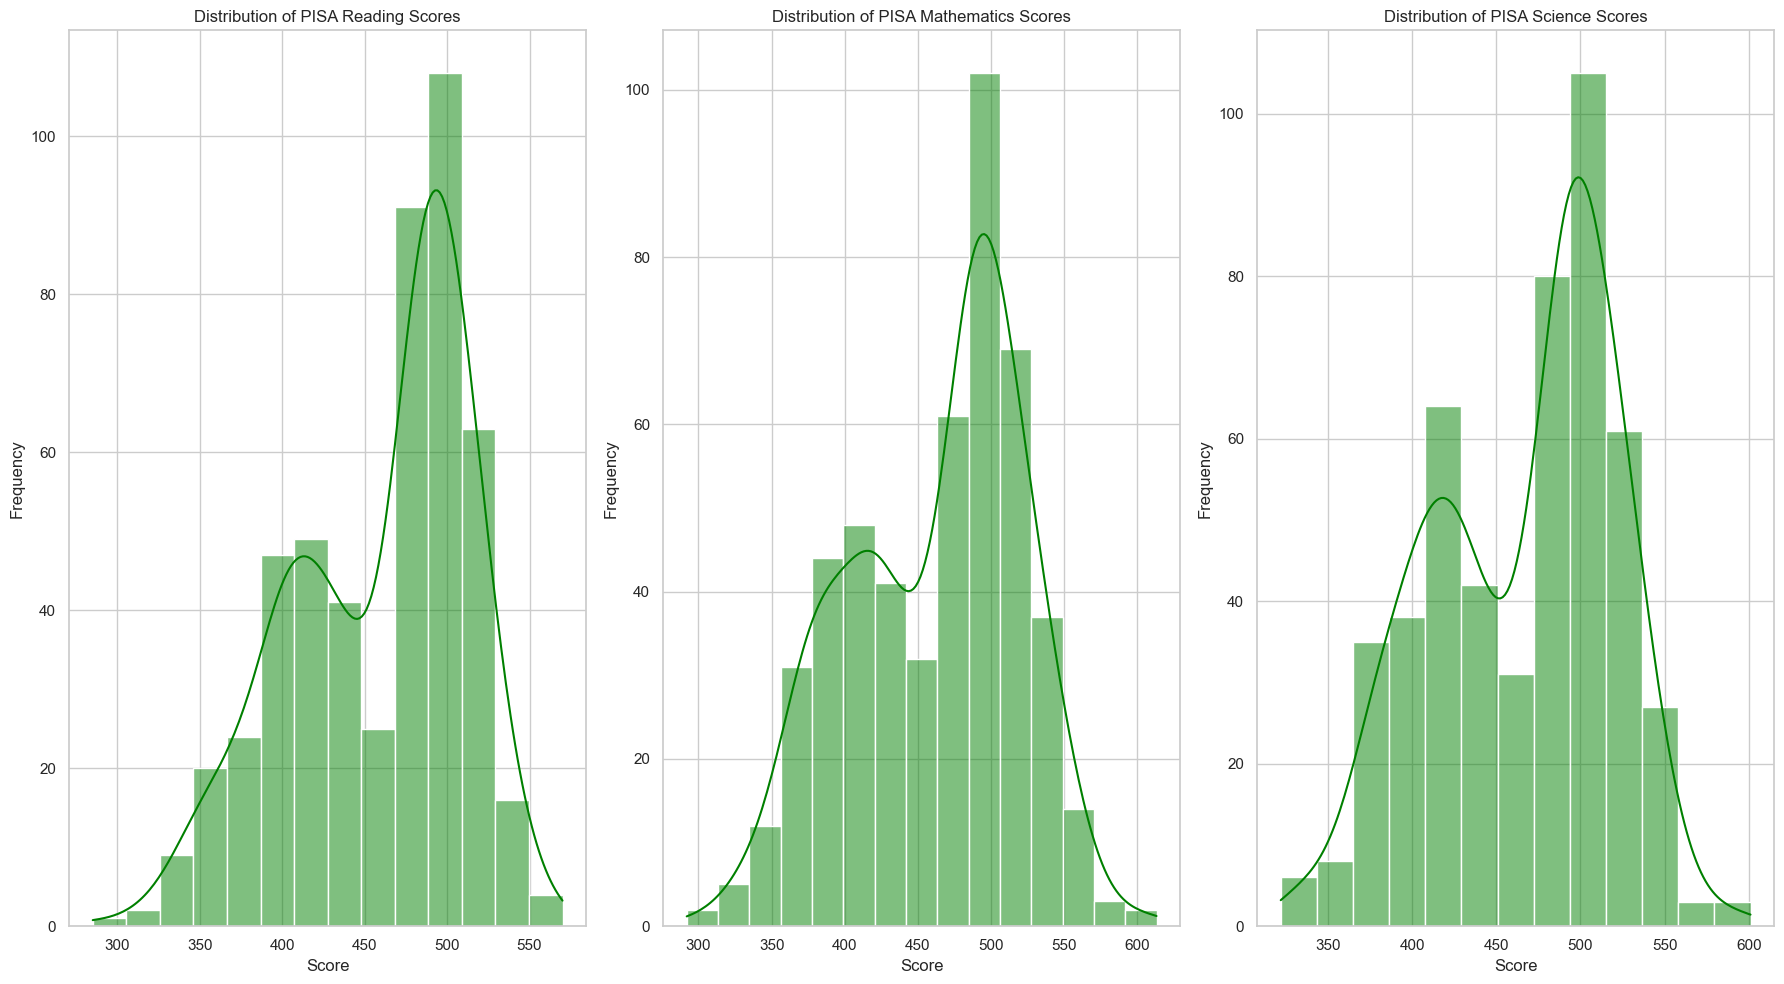

In [42]:
# Assuming you have separate columns for each subject and year in your PISA dataset
plt.figure(figsize=(18, 10))
for i, subject in enumerate(['Reading', 'Mathematics', 'Science']):
    plt.subplot(1, 3, i+1)
    sns.histplot(pisa_df[[col for col in pisa_df.columns if subject in col]].values.flatten(), kde=True, color='green')
    plt.title(f'Distribution of PISA {subject} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

##### Trend Analysis of PISA Scores

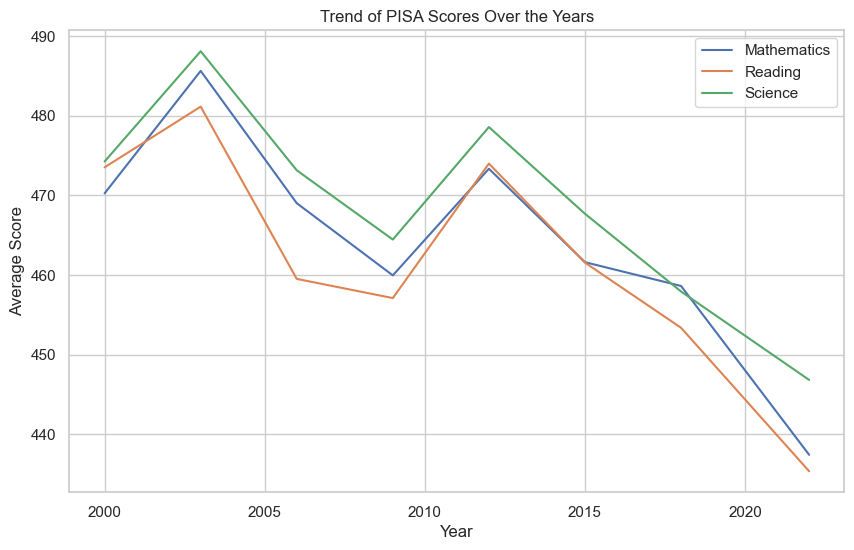

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that score columns start from the third column onward
score_columns = pisa_df.columns[2:]  # Adjust the index based on your actual data structure

data = []
for col in score_columns:
    year, subject = col.split('_')
    for idx, value in enumerate(pisa_df[col]):
        if pd.notna(value):  # This ensures that only non-null scores are processed
            data.append({'Country': pisa_df.iloc[idx, 0], 'Year': int(year), 'Subject': subject, 'Score': value})

# Convert list to DataFrame
pisa_long = pd.DataFrame(data)

# Pivot to have subjects as columns and years as rows
pisa_pivot = pisa_long.pivot_table(index='Year', columns='Subject', values='Score', aggfunc='mean')

# Plotting the average PISA scores over years for each subject
plt.figure(figsize=(10, 6))
for subject in pisa_pivot.columns:
    plt.plot(pisa_pivot.index, pisa_pivot[subject], label=subject)
plt.title('Trend of PISA Scores Over the Years')
plt.ylabel('Average Score')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

##### Cluster Analysis of PISA Scores (pretty, but not very useful?)

Subject    Country  Mathematics     Reading     Science
0          Albania      395.000  382.666667  397.333333
1          Algeria      360.000  350.000000  376.000000
2        Argentina      394.000  407.666667  411.285714
3        Australia      508.375  512.125000  518.500000
4          Austria      499.875  485.250000  499.625000


C:\Users\kenan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Subject        Country  cluster
0              Albania        0
1              Algeria        0
2            Argentina        2
3            Australia        1
4              Austria        1
..                 ...      ...
90       United States        1
91             Uruguay        2
92          Uzbekistan        0
93       Venezuela, RB        2
94             Vietnam        1

[95 rows x 2 columns]


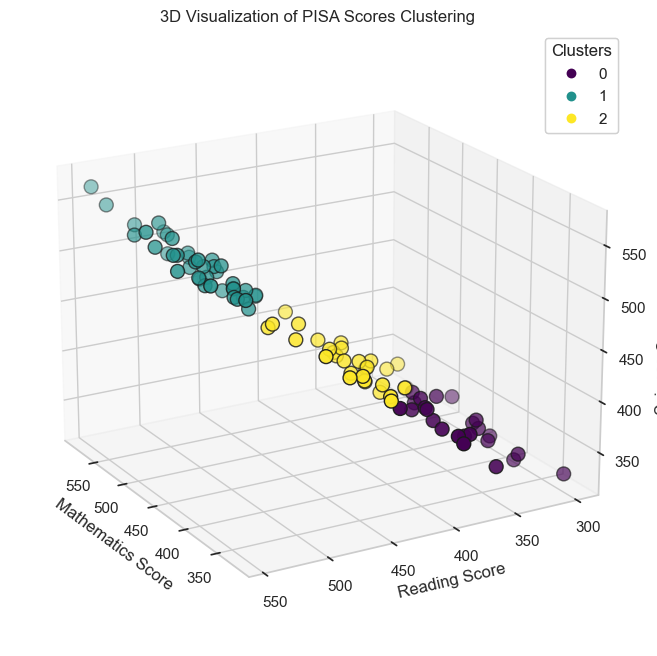

In [44]:
# Reshaping the DataFrame to have one column per subject
subjects = ['Reading', 'Mathematics', 'Science']
data = []

for col in pisa_df.columns:
    if '_' in col:
        year, subject = col.split('_')
        if subject in subjects:
            for idx, value in enumerate(pisa_df[col]):
                if pd.notna(value):
                    data.append({'Country': pisa_df['country_name'][idx], 'Year': int(year), 'Subject': subject, 'Score': value})

# Convert list to DataFrame
reshaped_data = pd.DataFrame(data)

# Pivot to create a single column per subject, averaging scores across all years
pisa_scores = reshaped_data.pivot_table(index='Country', columns='Subject', values='Score', aggfunc='mean').reset_index()

# Display the reshaped DataFrame
print(pisa_scores.head())

from sklearn.cluster import KMeans

# Assuming that `pisa_scores` contains the reshaped data with one column per subject
kmeans = KMeans(n_clusters=3, random_state=0)
pisa_scores['cluster'] = kmeans.fit_predict(pisa_scores[['Reading', 'Mathematics', 'Science']])

# Displaying the assigned clusters for each country
print(pisa_scores[['Country', 'cluster']])

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `pisa_scores` contains the reshaped data with 'cluster' column
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(pisa_scores['Mathematics'], 
                     pisa_scores['Reading'], 
                     pisa_scores['Science'], 
                     c=pisa_scores['cluster'], 
                     cmap='viridis', 
                     s=100, 
                     edgecolor='k')

# Adding labels and title
ax.set_xlabel('Mathematics Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Science Score')
ax.set_title('3D Visualization of PISA Scores Clustering')

# Legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Rotate the view to better display the clusters
ax.view_init(elev=20, azim=150)  # Elevation and Azimuthal angles

plt.show()

### Data Cleaning and Preprocessing

##### Missing values in WERD and PISA scores will not be imputed, and what will happen instead is:

######

1. Each country's last PISA score will be used for prediction
2. Every policy that occurs up to 1 year before the last PISA score will not be used for prediction
3. A country with PISA score but no Educational Reform Policy will not be included in the model

#### Feature Engineering

##### Last year of test for each country

In [45]:
import pandas as pd

# Assuming pisa_df is correctly loaded with all columns

# Drop the 'No' and 'Country_Name' columns to focus on the PISA scores
pisa_scores_only = pisa_df.drop(['no', 'country_name'], axis=1)

# Extract unique years from the remaining columns properly
years = pisa_scores_only.columns.str.extract(r'(\d{4})_')[0].dropna().unique()

# Define a function to find the last year with valid data for each subject
def get_last_year(row):
    valid_years = []
    for year in years:
        # Check if the score for each subject is not null before adding to valid_years
        if pd.notnull(row.get(f'{year}_Science', None)) or \
           pd.notnull(row.get(f'{year}_Mathematics', None)) or \
           pd.notnull(row.get(f'{year}_Reading', None)):
            valid_years.append(year)
    if valid_years:
        return max(valid_years)
    return None

# Apply the function to the original DataFrame to find the last year of PISA test for each country
pisa_df['Last_PISA_Year'] = pisa_df.apply(get_last_year, axis=1)

# Count the number of countries whose last participation in PISA was each specific year
last_pisa_year_counts = pisa_df['Last_PISA_Year'].value_counts().sort_index()

print("Number of countries with their last PISA test year:")
print(last_pisa_year_counts)

Number of countries with their last PISA test year:
Last_PISA_Year
2009     4
2012     1
2015     3
2018     6
2022    81
Name: count, dtype: int64


##### Calculate PISA Score of last participation

In [46]:
# Calculate the mean PISA score for the last year of participation
def calculate_mean_score(row, subjects=['Reading', 'Mathematics', 'Science']):
    last_year = row['Last_PISA_Year']
    # Adjust the column name format to use underscore instead of space
    scores = [row[f'{last_year}_{subject}'] for subject in subjects if f'{last_year}_{subject}' in row]
    return pd.Series(scores).mean()

# Apply the function to calculate the mean scores for the last PISA year
pisa_df['Mean_Last_PISA_Score'] = pisa_df.apply(calculate_mean_score, axis=1)

In [47]:
pisa_df['Mean_Last_PISA_Score'].describe()

count     95.000000
mean     437.796491
std       58.665847
min      325.000000
25%      394.500000
50%      436.333333
75%      484.333333
max      578.666667
Name: Mean_Last_PISA_Score, dtype: float64

##### Remove policies more than one year before the last participation

In [48]:
werd_df.shape

(10955, 8)

In [49]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10955 entries, 0 to 10954
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reform_id                      10955 non-null  int64  
 1   country_code                   10880 non-null  object 
 2   country_name                   10955 non-null  object 
 3   reporting_entity               10955 non-null  object 
 4   year                           10237 non-null  float64
 5   reform_title                   10954 non-null  object 
 6   reform_description             10955 non-null  object 
 7   reform_description_translated  10955 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 684.8+ KB


In [50]:
# Merge the last PISA year into WERD DataFrame to filter reforms
werd_df = werd_df.merge(pisa_df[['country_name', 'Last_PISA_Year']], on='country_name', how='left')

# Convert Last_PISA_Year to integer and filter rows
werd_df['Last_PISA_Year'] = pd.to_numeric(werd_df['Last_PISA_Year'])
werd_df = werd_df[werd_df['year'] < werd_df['Last_PISA_Year']]

# Remove policies from the year of the last PISA test onwards
werd_df = werd_df[werd_df['year'] < ((werd_df['Last_PISA_Year'])-1)]

In [51]:
werd_df.shape

(6668, 9)

In [52]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6668 entries, 43 to 10722
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reform_id                      6668 non-null   int64  
 1   country_code                   6642 non-null   object 
 2   country_name                   6668 non-null   object 
 3   reporting_entity               6668 non-null   object 
 4   year                           6668 non-null   float64
 5   reform_title                   6667 non-null   object 
 6   reform_description             6668 non-null   object 
 7   reform_description_translated  6668 non-null   object 
 8   Last_PISA_Year                 6668 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 520.9+ KB


In [75]:
sample_df_before_cleaning = werd_df.iloc[74:78, [2, 4, 7]]

In [76]:
sample_df_before_cleaning.to_csv('../Output Figures/sample_df_before_cleaning.csv', index=False)

##### Combine remaining policies as one column

In [77]:
# Combine all policies descriptions into one column per country
werd_df['combined_reform_description'] = werd_df.groupby('country_name')['reform_description_translated'].transform(lambda x: ' '.join(x))

# Drop duplicates after combining the texts
werd_df = werd_df[['country_name', 'combined_reform_description']].drop_duplicates()

In [78]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 43 to 10600
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_name                 91 non-null     object
 1   combined_reform_description  91 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


##### Removing Stop Words from reform_description

In [79]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text normalization function
def normalize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

# Apply normalization
werd_df['reform_description_clean'] = werd_df['combined_reform_description'].apply(normalize_text)

In [80]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 43 to 10600
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_name                 91 non-null     object
 1   combined_reform_description  91 non-null     object
 2   reform_description_clean     91 non-null     object
dtypes: object(3)
memory usage: 2.8+ KB


In [91]:
sample_df_after_combining = werd_df.iloc[0:2, [0, 2]]

In [92]:
sample_df_after_combining.to_csv('../Output Figures/sample_df_after_combining.csv', index=False)

##### Combining df

In [32]:
print(werd_df.info())
print(pisa_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 43 to 10600
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_name                 91 non-null     object
 1   combined_reform_description  91 non-null     object
 2   reform_description_clean     91 non-null     object
dtypes: object(3)
memory usage: 2.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no                    95 non-null     int64  
 1   country_name          95 non-null     object 
 2   2000_Reading          39 non-null     float64
 3   2000_Mathematics      40 non-null     float64
 4   2000_Science          41 non-null     float64
 5   2003_Reading          38 non-null     float64
 6   2003_Mathematics      39 non-null     float64
 7   20

##### Check different country names

In [33]:
werd_df['country_name']

43             Albania
125            Algeria
249          Argentina
379          Australia
468            Austria
             ...      
10277    United States
10342          Uruguay
10470       Uzbekistan
10551    Venezuela, RB
10600          Vietnam
Name: country_name, Length: 91, dtype: object

In [34]:
import pandas as pd

# Assuming werd_df and pisa_df are already loaded
unique_werd_countries = set(werd_df['country_name'].unique())
unique_pisa_countries = set(pisa_df['country_name'].unique())

# Find countries that appear in one dataframe but not the other
werd_not_in_pisa = unique_werd_countries - unique_pisa_countries
pisa_not_in_werd = unique_pisa_countries - unique_werd_countries

print("Countries in WERD not in PISA:", werd_not_in_pisa)
print("Countries in PISA not in WERD:", pisa_not_in_werd)

Countries in WERD not in PISA: set()
Countries in PISA not in WERD: {'Macao (China)', 'Taiwan', 'Hong Kong', 'Liechtenstein'}


##### Combine DF

In [35]:
import pandas as pd

# Assuming werd_df and pisa_df are pre-loaded DataFrames
# Performing an outer merge and selecting specific columns
final_df = pd.merge(werd_df[['country_name', 'reform_description_clean']],
                    pisa_df[['country_name', 'Mean_Last_PISA_Score']],
                    on='country_name', how='outer')

print("Preview of the merged DataFrame:")
print(final_df.head())

Preview of the merged DataFrame:
  country_name                           reform_description_clean  \
0      Albania  although compulsory education established law ...   
1      Algeria  national institute educational research create...   
2    Argentina  probably important change took place recogniti...   
3    Australia  state government education act make provision ...   
4      Austria  school reform empress maria theresa establishm...   

   Mean_Last_PISA_Score  
0            367.333333  
1            362.000000  
2            395.000000  
3            497.333333  
4            486.000000  


In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              95 non-null     object 
 1   reform_description_clean  91 non-null     object 
 2   Mean_Last_PISA_Score      95 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.4+ KB


##### Four countries will be dropped because there are no reform descriptions for them: Hong Kong, Taiwan, Macao, and Liechtenstein

In [37]:
# Remove rows where either 'reform_description_clean' or 'Mean_Last_PISA_Score' is NaN
final_df.dropna(subset=['reform_description_clean', 'Mean_Last_PISA_Score'], inplace=True)

print("Preview of the cleaned DataFrame:")
print(final_df.head())

Preview of the cleaned DataFrame:
  country_name                           reform_description_clean  \
0      Albania  although compulsory education established law ...   
1      Algeria  national institute educational research create...   
2    Argentina  probably important change took place recogniti...   
3    Australia  state government education act make provision ...   
4      Austria  school reform empress maria theresa establishm...   

   Mean_Last_PISA_Score  
0            367.333333  
1            362.000000  
2            395.000000  
3            497.333333  
4            486.000000  


In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              91 non-null     object 
 1   reform_description_clean  91 non-null     object 
 2   Mean_Last_PISA_Score      91 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


#### Checkpoint (Save as csv)

In [39]:
# Save the final DataFrame to a CSV file
final_df.to_csv('../Data/final_pisa_werd_merged.csv', index=False)

### Load from checkpoint

In [15]:
import pandas as pd
import numpy as np

final_df = pd.read_csv('../Data/final_pisa_werd_merged.csv')

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              91 non-null     object 
 1   reform_description_clean  91 non-null     object 
 2   Mean_Last_PISA_Score      91 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.3+ KB


In [17]:
final_df.head()

,country_name,reform_description_clean,Mean_Last_PISA_Score
0,Albania,although compulsory education established law ...,367.333333
1,Algeria,national institute educational research create...,362.000000
2,Argentina,probably important change took place recogniti...,395.000000
3,Australia,state government education act make provision ...,497.333333
4,Austria,school reform empress maria theresa establishm...,486.000000


### EDA after feature engineering

#### Statistics of Mean PISA Score

In [18]:
# Descriptive statistics of the numerical column
print(final_df['Mean_Last_PISA_Score'].describe())

# Basic info and summary of the dataframe
final_df.info()
final_df.describe()

count     91.000000
mean     433.816850
std       56.680832
min      325.000000
25%      390.666667
50%      428.000000
75%      480.833333
max      578.666667
Name: Mean_Last_PISA_Score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              91 non-null     object 
 1   reform_description_clean  91 non-null     object 
 2   Mean_Last_PISA_Score      91 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.3+ KB


,Mean_Last_PISA_Score
count,91.000000
mean,433.816850
std,56.680832
min,325.000000
25%,390.666667
50%,428.000000
75%,480.833333
max,578.666667


##### Distribution of mean last PISA Scores

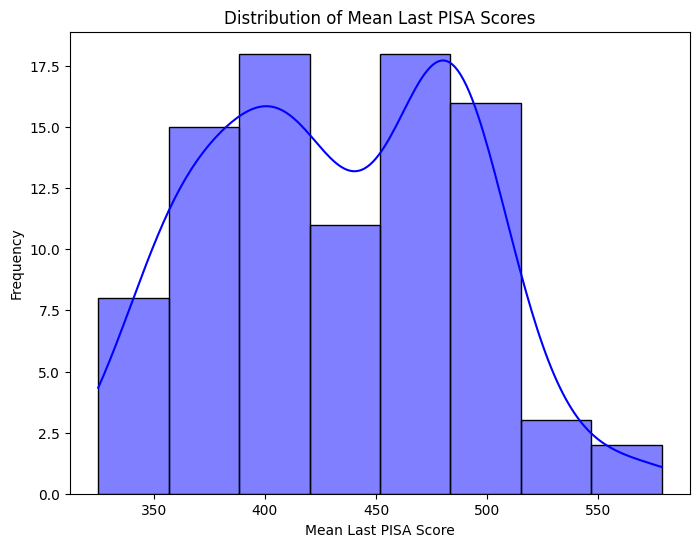

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Mean_Last_PISA_Score
plt.figure(figsize=(8, 6))
sns.histplot(final_df['Mean_Last_PISA_Score'], kde=True, color='blue')
plt.title('Distribution of Mean Last PISA Scores')
plt.xlabel('Mean Last PISA Score')
plt.ylabel('Frequency')
plt.show()

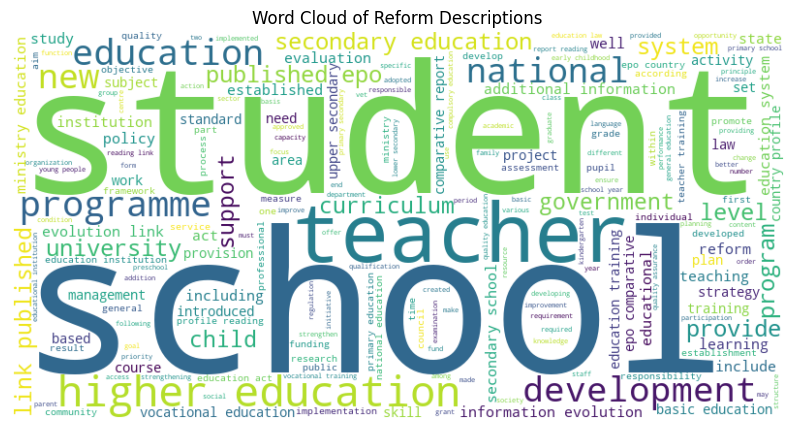

In [20]:
from wordcloud import WordCloud

# Combining all reform descriptions into one string
text = " ".join(description for description in final_df.reform_description_clean)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reform Descriptions')
plt.show()

### Word Embeddings

##### TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(final_df['reform_description_clean'])

print(tfidf_features.shape)

(91, 12019)


##### Word2Vec

In [21]:
import gensim

# Tokenize the cleaned descriptions
final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())

# Train a Word2Vec model
word2vec_model = gensim.models.Word2Vec(final_df['tokens'])

# Function to vectorize a document using the mean of all words
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if not doc:
        return np.zeros(100)
    return np.mean(word2vec_model.wv[doc], axis=0)

# Apply the function to each document
word2vec_features = np.vstack(final_df['tokens'].apply(document_vector))

print("Word2Vec features shape:", word2vec_features.shape)

Word2Vec features shape: (91, 100)


##### Doc2Vec

In [27]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tokenize the cleaned descriptions
final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())

# Create tagged document objects for Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_df['tokens'])]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(documents)

# Infer the vectors for input documents
doc2vec_features = np.array([doc2vec_model.infer_vector(doc.words) for doc in documents])

print("Doc2Vec features shape:", doc2vec_features.shape)

Doc2Vec features shape: (91, 100)


##### BERT Base

In [52]:
from transformers import BertTokenizer, BertModel
import torch

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to encode text into embeddings
def encode_text(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Apply the function to each description
bert_base_features = np.vstack(final_df['reform_description_clean'].apply(encode_text))

print("BERT features shape:", bert_base_features.shape)

C:\Users\kenan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BERT features shape: (91, 768)


#### BERT Large

In [55]:
from transformers import BertTokenizer, BertModel
import torch

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
model = BertModel.from_pretrained('bert-large-uncased')

# Function to encode text into embeddings
def encode_text_large(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Apply the function to each description
bert_large_features = np.vstack(final_df['reform_description_clean'].apply(encode_text_large))

print("BERT features shape:", bert_large_features.shape)

C:\Users\kenan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BERT features shape: (91, 1024)


### Model Testing

#### TF-IDF Model Testing

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Example features and target variable
X = tfidf_features
y = final_df['Mean_Last_PISA_Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression")
print(f'Mean Absolute Error: {linear_mae}')
print(f'Mean Squared Error: {linear_mse}')
print(f'Root Mean Squared Error: {linear_rmse}')
print(f'R² Score: {linear_r2}')

Linear Regression
Mean Absolute Error: 37.637880772741376
Mean Squared Error: 2153.7364893378995
Root Mean Squared Error: 46.40836658769515
R² Score: 0.5004186669802189


##### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs = -1)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Random Forest Regression")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Random Forest Regression
Mean Absolute Error: 41.121871345029184
Mean Squared Error: 2519.286871994798
Root Mean Squared Error: 50.19249816451456
R² Score: 0.4156254955046471


#### XG Boost

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Regression")
print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'Root Mean Squared Error: {xgb_rmse}')
print(f'R² Score: {xgb_r2}')

XGBoost Regression
Mean Absolute Error: 45.3185028611568
Mean Squared Error: 3064.095806459063
Root Mean Squared Error: 55.354275412645976
R² Score: 0.2892514590019658


#### Super Vector Machine Regressor TFIDF

In [47]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already prepared and are suitable for regression tasks

# Create an SVM regressor pipeline with appropriate scaling for sparse data
svm_pipeline = make_pipeline(MaxAbsScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_pipeline.predict(X_test)

# Evaluate the model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_predictions)

# Output the performance metrics
print("SVM Regression")
print(f'Mean Absolute Error: {svm_mae}')
print(f'Mean Squared Error: {svm_mse}')
print(f'Root Mean Squared Error: {svm_rmse}')
print(f'R² Score: {svm_r2}')

SVM Regression
Mean Absolute Error: 60.831340888540595
Mean Squared Error: 4295.912556668858
Root Mean Squared Error: 65.54321136981967
R² Score: 0.0035188927607316955


#### Word2Vec Model Testing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Example features and target variable
X = word2vec_features
y = final_df['Mean_Last_PISA_Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression")
print(f'Mean Absolute Error: {linear_mae}')
print(f'Mean Squared Error: {linear_mse}')
print(f'Root Mean Squared Error: {linear_rmse}')
print(f'R² Score: {linear_r2}')

Linear Regression
Mean Absolute Error: 205.48102181417897
Mean Squared Error: 238735.85082810995
Root Mean Squared Error: 488.60602823554063
R² Score: -77.91340294459725


##### Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs= -1)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Random Forest Regression")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Random Forest Regression
Mean Absolute Error: 32.29099415204672
Mean Squared Error: 1503.6575854450884
Root Mean Squared Error: 38.777023937443786
R² Score: 0.5029705990142099


##### XG Boost Regressor

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Regression")
print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'Root Mean Squared Error: {xgb_rmse}')
print(f'R² Score: {xgb_r2}')

XGBoost Regression
Mean Absolute Error: 35.32858544065241
Mean Squared Error: 2089.2402317752585
Root Mean Squared Error: 45.70820748810063
R² Score: 0.30940805209498834


##### SVM Regressor Word2Vec

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already prepared and are suitable for regression tasks

# Create an SVM regressor pipeline with appropriate scaling for sparse data
svm_pipeline = make_pipeline(MaxAbsScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_pipeline.predict(X_test)

# Evaluate the model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_predictions)

# Output the performance metrics
print("SVM Regression")
print(f'Mean Absolute Error: {svm_mae}')
print(f'Mean Squared Error: {svm_mse}')
print(f'Root Mean Squared Error: {svm_rmse}')
print(f'R² Score: {svm_r2}')

SVM Regression
Mean Absolute Error: 48.77313971126242
Mean Squared Error: 2873.336793962789
Root Mean Squared Error: 53.60351475381805
R² Score: 0.050227339417156625


#### Doc2Vec Model Testing

In [28]:
from sklearn.model_selection import train_test_split

# Example features and target variable
X = doc2vec_features
y = final_df['Mean_Last_PISA_Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Linear Regression Doc2Vec

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression")
print(f'Mean Absolute Error: {linear_mae}')
print(f'Mean Squared Error: {linear_mse}')
print(f'Root Mean Squared Error: {linear_rmse}')
print(f'R² Score: {linear_r2}')

Linear Regression
Mean Absolute Error: 102.61717465049344
Mean Squared Error: 19905.79449845723
Root Mean Squared Error: 141.0878963570484
R² Score: -5.579799291728936


##### Random Forest Regressor Doc2Vec

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Random Forest Regression")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Random Forest Regression
Mean Absolute Error: 39.0375438596491
Mean Squared Error: 2232.1826248213106
Root Mean Squared Error: 47.245979985828534
R² Score: 0.2621588826837725


##### XGBoost Doc2Vec

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Regression")
print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'Root Mean Squared Error: {xgb_rmse}')
print(f'R² Score: {xgb_r2}')

XGBoost Regression
Mean Absolute Error: 42.76973630670915
Mean Squared Error: 2950.2905125908546
Root Mean Squared Error: 54.31657677533494
R² Score: 0.02479052385251812


##### SVM Regressor Doc2Vec

In [32]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already prepared and are suitable for regression tasks

# Create an SVM regressor pipeline with appropriate scaling for sparse data
svm_pipeline = make_pipeline(MaxAbsScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_pipeline.predict(X_test)

# Evaluate the model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_predictions)

# Output the performance metrics
print("SVM Regression")
print(f'Mean Absolute Error: {svm_mae}')
print(f'Mean Squared Error: {svm_mse}')
print(f'Root Mean Squared Error: {svm_rmse}')
print(f'R² Score: {svm_r2}')

SVM Regression
Mean Absolute Error: 47.858054638395906
Mean Squared Error: 2767.6093903042206
Root Mean Squared Error: 52.60807343273673
R² Score: 0.08517520827830183


##### Model Testing BERT

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Example features and target variable
X = bert_base_features
y = final_df['Mean_Last_PISA_Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Linear Regression BERT

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression")
print(f'Mean Absolute Error: {linear_mae}')
print(f'Mean Squared Error: {linear_mse}')
print(f'Root Mean Squared Error: {linear_rmse}')
print(f'R² Score: {linear_r2}')

Linear Regression
Mean Absolute Error: 39.869642291152694
Mean Squared Error: 2100.9156871212276
Root Mean Squared Error: 45.835746826262444
R² Score: 0.3055487661558125


##### Random Forest Regressor BERT

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Random Forest Regression")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Random Forest Regression
Mean Absolute Error: 44.119064327485425
Mean Squared Error: 2533.906187914235
Root Mean Squared Error: 50.337919980013424
R² Score: 0.16242508472405692


##### XGBoost BERT

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Regression")
print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'Root Mean Squared Error: {xgb_rmse}')
print(f'R² Score: {xgb_r2}')

XGBoost Regression
Mean Absolute Error: 52.099373800712726
Mean Squared Error: 3612.801339904587
Root Mean Squared Error: 60.10658316611074
R² Score: -0.19420039724131222


##### SVM Regressor BERT

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already prepared and are suitable for regression tasks

# Create an SVM regressor pipeline with appropriate scaling for sparse data
svm_pipeline = make_pipeline(MaxAbsScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_pipeline.predict(X_test)

# Evaluate the model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_predictions)

# Output the performance metrics
print("SVM Regression")
print(f'Mean Absolute Error: {svm_mae}')
print(f'Mean Squared Error: {svm_mse}')
print(f'Root Mean Squared Error: {svm_rmse}')
print(f'R² Score: {svm_r2}')

SVM Regression
Mean Absolute Error: 50.050225266155856
Mean Squared Error: 2996.630965942066
Root Mean Squared Error: 54.74149217862138
R² Score: 0.009472829190176002


#### Model Testing BERT Large

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Example features and target variable
X = bert_large_features
y = final_df['Mean_Last_PISA_Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Linear Regression BERT Large

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression")
print(f'Mean Absolute Error: {linear_mae}')
print(f'Mean Squared Error: {linear_mse}')
print(f'Root Mean Squared Error: {linear_rmse}')
print(f'R² Score: {linear_r2}')

Linear Regression
Mean Absolute Error: 42.07239037229304
Mean Squared Error: 2849.792753774515
Root Mean Squared Error: 53.38345018612524
R² Score: 0.05800974965791594


##### Random Forest BERT Large

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Random Forest Regression")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Random Forest Regression
Mean Absolute Error: 37.76011695906435
Mean Squared Error: 1912.2168647173503
Root Mean Squared Error: 43.72890193816156
R² Score: 0.36792258289039925


##### XGBoost BERT Large

In [59]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Regression")
print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'Root Mean Squared Error: {xgb_rmse}')
print(f'R² Score: {xgb_r2}')

XGBoost Regression
Mean Absolute Error: 39.299570719401046
Mean Squared Error: 2070.0637933716166
Root Mean Squared Error: 45.49795372730093
R² Score: 0.3157467649675616


##### SVM Regressor BERT Large

In [60]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already prepared and are suitable for regression tasks

# Create an SVM regressor pipeline with appropriate scaling for sparse data
svm_pipeline = make_pipeline(MaxAbsScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_pipeline.predict(X_test)

# Evaluate the model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_predictions)

# Output the performance metrics
print("SVM Regression")
print(f'Mean Absolute Error: {svm_mae}')
print(f'Mean Squared Error: {svm_mse}')
print(f'Root Mean Squared Error: {svm_rmse}')
print(f'R² Score: {svm_r2}')

SVM Regression
Mean Absolute Error: 50.26318447762949
Mean Squared Error: 3022.6047295165845
Root Mean Squared Error: 54.97822050154574
R² Score: 0.000887281339553958


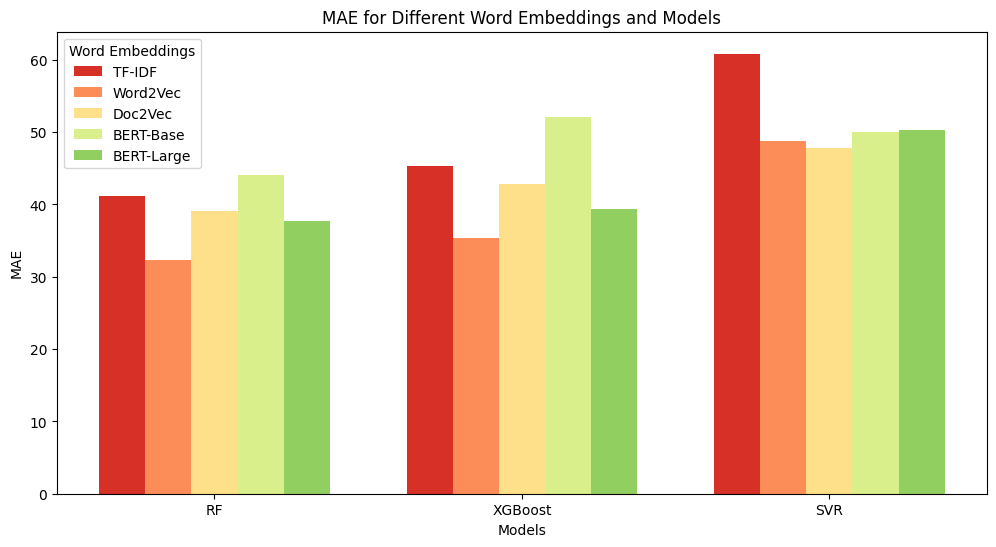

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['RF', 'XGBoost', 'SVR']
word_embeddings = ['TF-IDF', 'Word2Vec', 'Doc2Vec', 'BERT-Base', 'BERT-Large']

mae_values = [
    [41.12, 45.32, 60.83],  # TF-IDF
    [32.29, 35.33, 48.77],  # Word2Vec
    [39.04, 42.77, 47.86],  # Doc2Vec
    [44.12, 52.10, 50.05],  # BERT-Base
    [37.76, 39.30, 50.26]   # BERT-Large
]

# Color schemes
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']
bright_colors = ['#FF6347', '#FFD700', '#ADFF2F', '#87CEEB', '#FF69B4']
muted_colors = ['#B0C4DE', '#778899', '#2F4F4F', '#8B4513', '#A52A2A']
diverging_colors = ['#D73027', '#FC8D59', '#FEE08B', '#D9EF8B', '#91CF60']

# Choose your color scheme
colors = diverging_colors

# Plotting MAE
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # width of each bar
x = np.arange(len(models))

for i, mae in enumerate(mae_values):
    ax.bar(x + i * width, mae, width, label=word_embeddings[i], color=colors[i])

ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('MAE for Different Word Embeddings and Models')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(models)
ax.legend(title='Word Embeddings')

plt.show()

#### Hyperparameter Tuning

##### Hyperparameter Tune TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

# Define the target variable
y = final_df['Mean_Last_PISA_Score'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(final_df['reform_description_clean'], y, test_size=0.2, random_state=42)

# Create a pipeline that combines TF-IDF vectorization with a RandomForest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Define the parameter grid to search for the best parameters for TF-IDF
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output the best TF-IDF parameters
best_tfidf_params = grid_search.best_params_
print("Best TF-IDF parameters:", best_tfidf_params)

# Use the best TF-IDF parameters to transform the text data
best_tfidf_vectorizer = TfidfVectorizer(**{k.replace("tfidf__", ""): v for k, v in best_tfidf_params.items()})
X_train_tfidf = best_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = best_tfidf_vectorizer.transform(X_test)

# Fit the RandomForest with the best TF-IDF vectorized data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)
predictions = rf_model.predict(X_test_tfidf)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print performance metrics
print("Test MAE:", mae)
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R²:", r2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best TF-IDF parameters: {'tfidf__max_df': 1.0, 'tfidf__ngram_range': (1, 1)}
Test MAE: 42.46473684210526
Test MSE: 2697.1970695906443
Test RMSE: 51.934546013137
Test R²: 0.3743573951066873


##### Word2Vec Hyperparameter Tuning

In [65]:
import gensim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())

# Define the grid of hyperparameters for Word2Vec
vector_sizes = [50, 75, 100, 125, 150, 175, 200, 225]
windows = [1, 2, 3, 4, 5, 6, 7, 8]
min_counts = [1, 2, 3]

# Store the results for Word2Vec
word2vec_results = []

for vector_size in vector_sizes:
    for window in windows:
        for min_count in min_counts:
            model = gensim.models.Word2Vec(final_df['tokens'], vector_size=vector_size, window=window, min_count=min_count, workers=4)
            # Get the document vectors
            X = np.vstack(final_df['tokens'].apply(lambda doc: np.mean([model.wv[word] for word in doc if word in model.wv], axis=0)))
            y = final_df['Mean_Last_PISA_Score']
            
            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Fit the Random Forest model
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_train, y_train)
            predictions = rf_model.predict(X_test)
            mae = mean_absolute_error(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, predictions)
            
            # Append results
            word2vec_results.append({
                'vector_size': vector_size,
                'window': window,
                'min_count': min_count,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# Analyze the results to find the best configurations
import pandas as pd

# Convert results to DataFrame
word2vec_results_df = pd.DataFrame(word2vec_results)

# Function to display best configurations
def display_best_config(results_df, metric, minimize=True):
    if minimize:
        best_row = results_df.loc[results_df[metric].idxmin()]
    else:
        best_row = results_df.loc[results_df[metric].idxmax()]
    print(f"Best configuration based on {metric} ({'Min' if minimize else 'Max'}imize):")
    print(best_row)

# Metrics to check
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

# Display best configurations for Word2Vec
print("\nBest Word2Vec Configurations:")
for metric in metrics:
    display_best_config(word2vec_results_df, metric, minimize=(metric != 'R2'))



Best Word2Vec Configurations:
Best configuration based on MAE (Minimize):
vector_size     150.000000
window            7.000000
min_count         2.000000
MAE              33.423158
MSE            2009.850850
RMSE             44.831360
R2                0.533794
Name: 115, dtype: float64
Best configuration based on MSE (Minimize):
vector_size     150.000000
window            7.000000
min_count         2.000000
MAE              33.423158
MSE            2009.850850
RMSE             44.831360
R2                0.533794
Name: 115, dtype: float64
Best configuration based on RMSE (Minimize):
vector_size     150.000000
window            7.000000
min_count         2.000000
MAE              33.423158
MSE            2009.850850
RMSE             44.831360
R2                0.533794
Name: 115, dtype: float64
Best configuration based on R2 (Maximize):
vector_size     150.000000
window            7.000000
min_count         2.000000
MAE              33.423158
MSE            2009.850850
RMSE         

##### Hyperparameter Tune Doc2Vec

In [73]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())

# Store the results for Doc2Vec
doc2vec_results = []
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_df['tokens'])]

for vector_size in vector_sizes:
    for window in windows:
        for min_count in min_counts:
            model = Doc2Vec(documents, vector_size=vector_size, window=window, min_count=min_count, workers=4)
            # Infer vectors
            X = np.array([model.infer_vector(doc.words) for doc in documents])
            y = final_df['Mean_Last_PISA_Score']
            
            # Split and test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_train, y_train)
            predictions = rf_model.predict(X_test)
            mae = mean_absolute_error(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, predictions)
            
            doc2vec_results.append({
                'vector_size': vector_size,
                'window': window,
                'min_count': min_count,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# Convert results to DataFrame
doc2vec_results_df = pd.DataFrame(doc2vec_results)

# Display best configurations for Doc2Vec
print("\nBest Doc2Vec Configurations:")
for metric in metrics:
    display_best_config(doc2vec_results_df, metric, minimize=(metric != 'R2'))



Best Doc2Vec Configurations:
Best configuration based on MAE (Minimize):
vector_size     175.000000
window            6.000000
min_count         3.000000
MAE              30.049474
MSE            1407.781209
RMSE             37.520411
R2                0.673451
Name: 137, dtype: float64
Best configuration based on MSE (Minimize):
vector_size     175.000000
window            6.000000
min_count         3.000000
MAE              30.049474
MSE            1407.781209
RMSE             37.520411
R2                0.673451
Name: 137, dtype: float64
Best configuration based on RMSE (Minimize):
vector_size     175.000000
window            6.000000
min_count         3.000000
MAE              30.049474
MSE            1407.781209
RMSE             37.520411
R2                0.673451
Name: 137, dtype: float64
Best configuration based on R2 (Maximize):
vector_size     175.000000
window            6.000000
min_count         3.000000
MAE              30.049474
MSE            1407.781209
RMSE          

##### Hyperparameter Tuning BERT

In [54]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()  # Set the model to evaluation mode

# Function to encode text into embeddings, with careful handling of max_length
def encode_text(texts, max_len, padding, truncation):
    # Ensure max_len does not exceed model's max input size
    max_len = min(max_len, tokenizer.model_max_length)
    inputs = tokenizer(texts, return_tensors='pt', padding=padding, truncation=truncation, max_length=max_len)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Define parameters
parameters = {
    'max_length': [128, 256, 512],  # Test different lengths, ensuring they do not exceed the BERT max length
    'padding': ['max_length'],      # Ensure padding to max_length for consistent input size
    'truncation': [True]            # Always truncate to max_length
}

# Store the results
bert_results = []

for max_len, pad, trunc in product(parameters['max_length'], parameters['padding'], parameters['truncation']):
    # Encode text data ensuring all texts are processed within BERT's constraints
    X = np.vstack(final_df['reform_description_clean'].apply(lambda text: encode_text([text], max_len, pad, trunc)))

    # Split and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Append results
    bert_results.append({
        'max_length': max_len,
        'padding': pad,
        'truncation': trunc,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

# Convert results to DataFrame
bert_results_df = pd.DataFrame(bert_results)

# Display best configurations for BERT
print("\nBest BERT Configurations:")
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
for metric in metrics:
    best_config = bert_results_df.loc[bert_results_df[metric].idxmin()] if metric != 'R2' else bert_results_df.loc[bert_results_df[metric].idxmax()]
    print(f"Best {metric}: {best_config.to_dict()}")


C:\Users\kenan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Best BERT Configurations:
Best MAE: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 47.578947368421055, 'MSE': 3157.414350877193, 'RMSE': 56.190874266887796, 'R2': 0.26760526270698315}
Best MSE: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 47.578947368421055, 'MSE': 3157.414350877193, 'RMSE': 56.190874266887796, 'R2': 0.26760526270698315}
Best RMSE: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 47.578947368421055, 'MSE': 3157.414350877193, 'RMSE': 56.190874266887796, 'R2': 0.26760526270698315}
Best R2: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 47.578947368421055, 'MSE': 3157.414350877193, 'RMSE': 56.190874266887796, 'R2': 0.26760526270698315}


##### Hyperparameter Tune BERT Large

In [62]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
model = BertModel.from_pretrained('bert-large-uncased')
model.eval()  # Set the model to evaluation mode

# Function to encode text into embeddings, with careful handling of max_length
def encode_text(texts, max_len, padding, truncation):
    # Ensure max_len does not exceed model's max input size
    max_len = min(max_len, tokenizer.model_max_length)
    inputs = tokenizer(texts, return_tensors='pt', padding=padding, truncation=truncation, max_length=max_len)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Define parameters
parameters = {
    'max_length': [128, 256, 512],  # Test different lengths, ensuring they do not exceed the BERT max length
    'padding': ['max_length'],      # Ensure padding to max_length for consistent input size
    'truncation': [True]            # Always truncate to max_length
}

# Store the results
bert_large_results = []

for max_len, pad, trunc in product(parameters['max_length'], parameters['padding'], parameters['truncation']):
    # Encode text data ensuring all texts are processed within BERT's constraints
    X = np.vstack(final_df['reform_description_clean'].apply(lambda text: encode_text([text], max_len, pad, trunc)))

    # Split and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Append results
    bert_large_results.append({
        'max_length': max_len,
        'padding': pad,
        'truncation': trunc,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

# Convert results to DataFrame
bert_large_results_df = pd.DataFrame(bert_large_results)

# Display best configurations for BERT
print("\nBest BERT Large Configurations:")
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
for metric in metrics:
    best_config = bert_large_results_df.loc[bert_large_results_df[metric].idxmin()] if metric != 'R2' else bert_large_results_df.loc[bert_large_results_df[metric].idxmax()]
    print(f"Best {metric}: {best_config.to_dict()}")



Best BERT Configurations:
Best MAE: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 48.66912280701758, 'MSE': 3142.954301754388, 'RMSE': 56.06205759472611, 'R2': 0.27095941984369176}
Best MSE: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 48.66912280701758, 'MSE': 3142.954301754388, 'RMSE': 56.06205759472611, 'R2': 0.27095941984369176}
Best RMSE: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 48.66912280701758, 'MSE': 3142.954301754388, 'RMSE': 56.06205759472611, 'R2': 0.27095941984369176}
Best R2: {'max_length': 128, 'padding': 'max_length', 'truncation': True, 'MAE': 48.66912280701758, 'MSE': 3142.954301754388, 'RMSE': 56.06205759472611, 'R2': 0.27095941984369176}


##### Hyperparameter Tune Random Forest using the best embeddings

In [75]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tokenize the cleaned descriptions
final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())

# Create tagged document objects for Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_df['tokens'])]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(documents, vector_size=175, window=6, min_count=3, workers=4)

# Infer the vectors for input documents
doc2vec_best = np.array([doc2vec_model.infer_vector(doc.words) for doc in documents])

print("Doc2Vec features shape:", doc2vec_features.shape)

Doc2Vec features shape: (91, 100)


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Example features and target variable
X = doc2vec_best
y = final_df['Mean_Last_PISA_Score'].values

# Parameter grid to search
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize a RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MAE score:", -grid_search.best_score_)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
Best MAE score: 27.24699316810545


##### Cross Validation Random Forest

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example features and target variable
X = doc2vec_best
y = final_df['Mean_Last_PISA_Score'].values

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=75, random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_jobs=-1)

# Define a K-fold cross validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics for evaluating the model
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for each metric
mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

# Convert the negative scores to positive where necessary
mae_scores = -mae_scores
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)

# Print scores from each fold
print("MAE scores from each fold: ", mae_scores)
print("Average MAE: ", np.mean(mae_scores))
print("Standard Deviation of MAE: ", np.std(mae_scores))

print("MSE scores from each fold: ", mse_scores)
print("Average MSE: ", np.mean(mse_scores))
print("Standard Deviation of MSE: ", np.std(mse_scores))

print("RMSE scores from each fold: ", rmse_scores)
print("Average RMSE: ", np.mean(rmse_scores))
print("Standard Deviation of RMSE: ", np.std(rmse_scores))

print("R² scores from each fold: ", r2_scores)
print("Average R²: ", np.mean(r2_scores))
print("Standard Deviation of R²: ", np.std(r2_scores))

MAE scores from each fold:  [38.31708493 34.61718107 26.04043621 27.28223251 23.32638977]
Average MAE:  29.916664899904088
Standard Deviation of MAE:  5.622437516643823
MSE scores from each fold:  [2083.49605808 2752.57945974  951.24091248 1149.64237436  823.98832288]
Average MSE:  1552.189425508143
Standard Deviation of MSE:  745.209106447828
RMSE scores from each fold:  [45.64532898 52.46503083 30.8421937  33.9063766  28.70519679]
Average RMSE:  38.312825382275705
Standard Deviation of RMSE:  9.182419982520614
R² scores from each fold:  [0.51671166 0.29428163 0.56635839 0.6287966  0.62129768]
Average R²:  0.525489193017923
Standard Deviation of R²:  0.1225201689931543


##### Hyperparameter Tune XGBoost

In [78]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import numpy as np

# Example features and target variable
X = doc2vec_best
y = final_df['Mean_Last_PISA_Score'].values

# Parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Setup GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

# Output the best parameters and the corresponding MAE
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best MAE score:", -grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
Best MAE score: 23.74423227886475


##### Cross Validation XGBoost

In [79]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params, random_state=42, n_jobs=-1)

# Define a K-fold cross validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the metrics for evaluating the model
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for each metric
mae_scores = cross_val_score(best_xgb_model, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(best_xgb_model, X, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(best_xgb_model, X, y, cv=kf, scoring=r2_scorer)

# Convert the negative scores to positive where necessary
mae_scores = -mae_scores
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)  # Calculate RMSE from MSE

# Print scores from each fold for MAE, MSE, and RMSE
print("MAE scores from each fold: ", mae_scores)
print("Average MAE: ", np.mean(mae_scores))
print("Standard Deviation of MAE: ", np.std(mae_scores))

print("MSE scores from each fold: ", mse_scores)
print("Average MSE: ", np.mean(mse_scores))
print("Standard Deviation of MSE: ", np.std(mse_scores))

print("RMSE scores from each fold: ", rmse_scores)
print("Average RMSE: ", np.mean(rmse_scores))
print("Standard Deviation of RMSE: ", np.std(rmse_scores))

# Print R² scores from each fold
print("R² scores from each fold: ", r2_scores)
print("Average R²: ", np.mean(r2_scores))
print("Standard Deviation of R²: ", np.std(r2_scores))

MAE scores from each fold:  [49.14003601 14.74253676 39.54928476 16.60561682 28.70259264 22.31641642
 21.82890489 32.53051758 25.44130226 24.93540446]
Average MAE:  27.579261259856047
Standard Deviation of MAE:  9.957171449903093
MSE scores from each fold:  [3551.05758055  355.47140038 3864.71727148  420.03888011 1089.10058476
  677.41810628  624.24374724 1576.03639502  877.12539119  700.79864206]
Average MSE:  1373.6007999068129
Standard Deviation of MSE:  1214.912530536575
RMSE scores from each fold:  [59.5907508  18.8539492  62.16685026 20.49485009 33.00152398 26.02725699
 24.98487037 39.69932487 29.61630279 26.47260172]
Average RMSE:  34.09082810621024
Standard Deviation of RMSE:  14.54015952249626
R² scores from each fold:  [0.2290693  0.88813847 0.27241738 0.80931934 0.59019639 0.59797309
 0.66630955 0.22801349 0.67446296 0.55804814]
Average R²:  0.5513948109404825
Standard Deviation of R²:  0.22322399214885993


##### Hyperparameter Tune SVM Regressor

In [80]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Example features and target variable
X = doc2vec_best  # Assuming 'doc2vec_best' is your feature set
y = final_df['Mean_Last_PISA_Score'].values

# Create a pipeline that includes scaling and the SVM
pipeline = make_pipeline(MaxAbsScaler(), SVR())

# Define the parameter grid to search for the best parameters for the SVM
param_grid = {
    'svr__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'svr__kernel': ['rbf', 'linear', 'poly'],  # Type of kernel
    'svr__epsilon': [0.1, 0.2, 0.5]  # Epsilon in the epsilon-SVR model
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Output the best parameters and the corresponding MAE
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best MAE score:", -grid_search.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'svr__C': 100, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best MAE score: 30.657463010021626


##### Cross Validation SVM Regressor

In [81]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming the best_params variable contains the optimal parameters found from GridSearchCV
# You'll need to adjust the parameter names when passing them to SVR
# Example: best_params might need to be reformatted from the pipeline's naming
best_svm_params = {k.replace('svr__', ''): v for k, v in best_params.items()}

# Initialize the SVM model with the best parameters
best_svm_model = make_pipeline(MaxAbsScaler(), SVR(**best_svm_params))

# Define a K-fold cross validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the metrics for evaluating the model
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for each metric
mae_scores = cross_val_score(best_svm_model, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(best_svm_model, X, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(best_svm_model, X, y, cv=kf, scoring=r2_scorer)

# Convert the negative scores to positive where necessary
mae_scores = -mae_scores
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)  # Calculate RMSE from MSE

# Print scores from each fold for MAE, MSE, and RMSE
print("MAE scores from each fold: ", mae_scores)
print("Average MAE: ", np.mean(mae_scores))
print("Standard Deviation of MAE: ", np.std(mae_scores))

print("MSE scores from each fold: ", mse_scores)
print("Average MSE: ", np.mean(mse_scores))
print("Standard Deviation of MSE: ", np.std(mse_scores))

print("RMSE scores from each fold: ", rmse_scores)
print("Average RMSE: ", np.mean(rmse_scores))
print("Standard Deviation of RMSE: ", np.std(rmse_scores))

# Print R² scores from each fold
print("R² scores from each fold: ", r2_scores)
print("Average R²: ", np.mean(r2_scores))
print("Standard Deviation of R²: ", np.std(r2_scores))

MAE scores from each fold:  [46.51673383 21.37911545 40.31986576 23.17487867 30.78183767 22.67771103
 27.37248348 31.57886547 25.01617757 18.6981798 ]
Average MAE:  28.75158487453591
Standard Deviation of MAE:  8.371452234380817
MSE scores from each fold:  [2943.99651957  666.40777049 4324.87664443  961.34598228 1327.80758347
  770.35163593  986.58455898 1802.11291165  908.23201101  428.28770264]
Average MSE:  1512.000332044881
Standard Deviation of MSE:  1160.3576721017637
RMSE scores from each fold:  [54.25860779 25.81487498 65.76379433 31.00557986 36.43909416 27.75520917
 31.40994363 42.45130047 30.13688788 20.69511301]
Average RMSE:  36.573040528879204
Standard Deviation of RMSE:  13.206552862796554
R² scores from each fold:  [0.36086159 0.79029144 0.18578647 0.56358782 0.50037642 0.54281988
 0.47261971 0.11727492 0.66291802 0.72990452]
Average R²:  0.49264407984042374
Standard Deviation of R²:  0.20840376541529435


### Secondary Research Questions

##### SRQ 1: Which educational reforms are the most significant predictors of the PISA score?

In [7]:
import pandas as pd
import numpy as np

final_df = pd.read_csv('../Data/final_pisa_werd_merged.csv')

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tokenize the cleaned descriptions
final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())

# Create tagged document objects for Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_df['tokens'])]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(documents,vector_size=175, window=6, min_count=3, workers=4)

# Infer the vectors for input documents
doc2vec_features_srq = np.array([doc2vec_model.infer_vector(doc.words) for doc in documents])

print("Doc2Vec features shape:", doc2vec_features_srq.shape)

Doc2Vec features shape: (91, 175)


#### Feature Importance

Doc2Vec features shape: (91, 175)


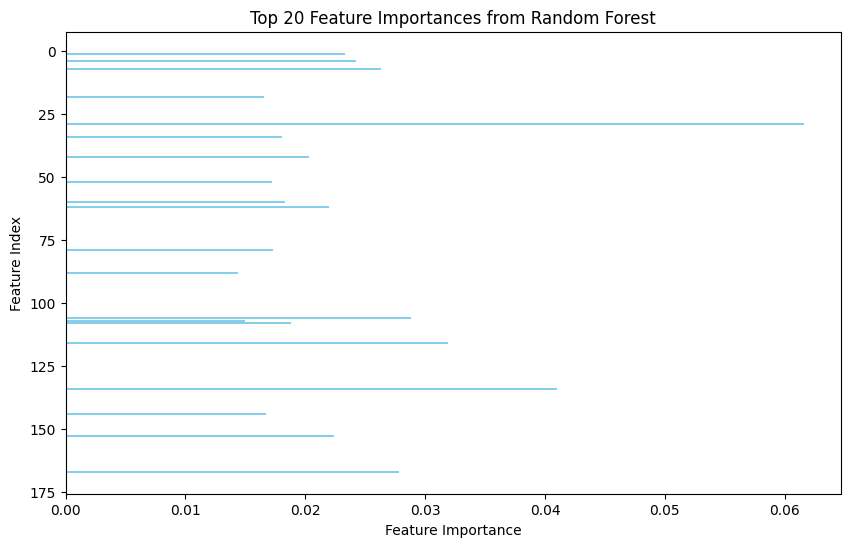

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
final_df = pd.read_csv('../Data/final_pisa_werd_merged.csv')

# Tokenize the cleaned descriptions
final_df['tokens'] = final_df['reform_description_clean'].apply(lambda x: x.split())

# Create tagged document objects for Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_df['tokens'])]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(documents, vector_size=175, window=6, min_count=3, workers=4)

# Infer the vectors for input documents
doc2vec_features_srq = np.array([doc2vec_model.infer_vector(doc.words) for doc in documents])

print("Doc2Vec features shape:", doc2vec_features_srq.shape)

# Prepare data for Random Forest model
X_train = doc2vec_features_srq
y_train = final_df['Mean_Last_PISA_Score'].values

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=75, random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Extract feature importance from Random Forest
rf_feature_importance = rf_model.feature_importances_

# Combine and display feature importance
importance_df = pd.DataFrame({
    'Feature': range(len(rf_feature_importance)),  # Using the feature index as the feature name
    'RandomForest': rf_feature_importance
})

importance_df.sort_values(by='RandomForest', ascending=False, inplace=True)

# Plotting the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['RandomForest'][:20], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Top 20 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

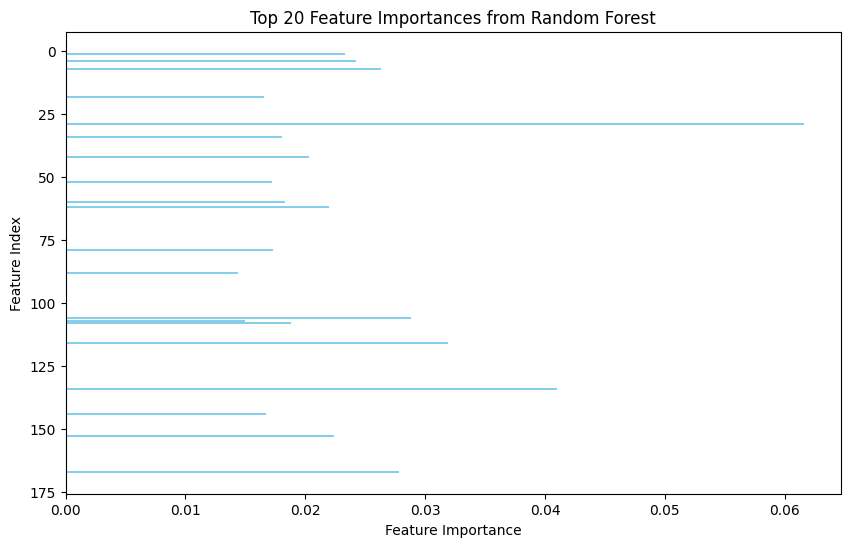

In [12]:
# Plotting the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['RandomForest'][:20], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Top 20 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

##### EPO is an acronym of the report by OECD called educational policy outlook https://www.oecd-ilibrary.org/education/education-policy-outlook-2022_c77c7a97-en

##### Feature importance for phrase

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Example data
X_train = final_df['reform_description_clean']
y_train = final_df['Mean_Last_PISA_Score'].values

# Adjust the CountVectorizer to include unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=1000)
X_train_transformed = vectorizer.fit_transform(X_train)

# Get the feature names (unigrams, bigrams, and trigrams)
feature_names = vectorizer.get_feature_names_out()

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=75, random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_jobs=-1)
rf_model.fit(X_train_transformed, y_train)

# Extract feature importance from Random Forest
rf_feature_importance = rf_model.feature_importances_

# Combine and display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_feature_importance
})

importance_df.sort_values(by='RandomForest', ascending=False, inplace=True)
print(importance_df.head(20))

                              Feature  RandomForest
579                           measure      0.024346
788                            report      0.020014
472                       information      0.017403
313                               epo      0.017249
550                link published epo      0.017120
473             information evolution      0.016928
186           country profile reading      0.016770
549                    link published      0.015635
217                            demand      0.014376
20             additional information      0.013310
144                comparative report      0.012431
745         published epo comparative      0.010820
21   additional information evolution      0.009849
843                  secondary school      0.009813
807                    responsibility      0.009600
718                   profile reading      0.009520
746             published epo country      0.009280
652                              part      0.008805
143         

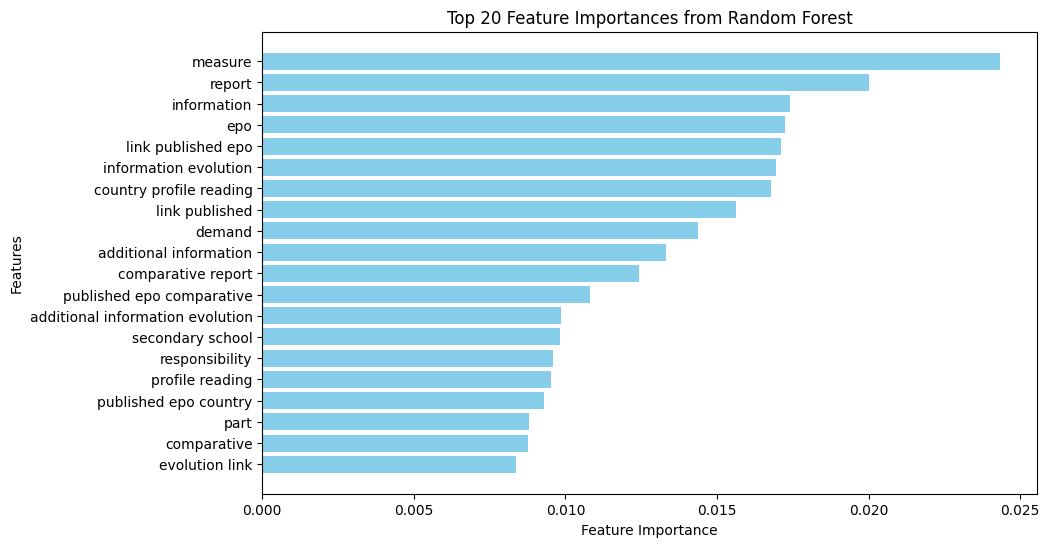

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
final_df = pd.read_csv('../Data/final_pisa_werd_merged.csv')

# Example data
X_train = final_df['reform_description_clean']
y_train = final_df['Mean_Last_PISA_Score'].values

# Adjust the CountVectorizer to include unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=1000)
X_train_transformed = vectorizer.fit_transform(X_train)

# Get the feature names (unigrams, bigrams, and trigrams)
feature_names = vectorizer.get_feature_names_out()

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=75, random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_jobs=-1)
rf_model.fit(X_train_transformed, y_train)

# Extract feature importance from Random Forest
rf_feature_importance = rf_model.feature_importances_

# Combine and display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_feature_importance
})

importance_df.sort_values(by='RandomForest', ascending=False, inplace=True)

# Plotting the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['RandomForest'][:20], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

##### SRQ 2

#### Category Analysis

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(final_df['reform_description_clean'])

In [40]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Step 3: Label the Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)



Topic 0:
act university vocational training programme ministry compulsory reform institution study
Topic 1:
training program law child institution policy ministry state project plan
Topic 2:
decree training law program teaching evaluation primary social university reform
Topic 3:
act skill child training support qualification teaching information programme published
Topic 4:
programme link information law additional reading published training epo http


In [44]:
# Step 4: Assign Topics as Categories
topic_assignments = lda.transform(X).argmax(axis=1)
final_df['reform_category'] = topic_assignments

# Map topic numbers to meaningful labels after inspecting the top words
topic_labels = {
    0: 'Higher Education and Vocational Training',
    1: 'Child and Policy-Focused Reforms',
    2: 'Primary Education and Teaching',
    3: 'Skills and Qualification Development',
    4: 'Information and Curriculum Development'
}

final_df['reform_category'] = final_df['reform_category'].map(topic_labels)

# Step 5: Train Models with the Same Vectorizer
# Use the same vectorizer to transform the text data
X_train = vectorizer.transform(final_df['reform_description_clean'])
y_train = final_df['Mean_Last_PISA_Score'].values

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=75, random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 9, min_child_weight = 1, n_estimators = 100, subsample = 0.7)
xgb_model.fit(X_train, y_train)

# Step 6: Calculate and Aggregate Impacts by Category using the same vectorizer
def vectorize_text(text_list):
    return vectorizer.transform(text_list)

def calculate_impact(df, rf_model, xgb_model):
    X = vectorize_text(df['reform_description_clean'].tolist())
    rf_impact = rf_model.predict(X).mean()
    xgb_impact = xgb_model.predict(X).mean()
    return pd.Series({'RandomForestImpact': rf_impact, 'XGBoostImpact': xgb_impact})

# Group by category and calculate impact
category_impact = final_df.groupby('reform_category').apply(lambda df: calculate_impact(df, rf_model, xgb_model))

# Sort by impact
category_impact.sort_values(by='RandomForestImpact', ascending=False, inplace=True)

# Display the results
print(category_impact)

                                          RandomForestImpact  XGBoostImpact
reform_category                                                            
Skills and Qualification Development              483.265477     496.836548
Information and Curriculum Development            467.359661     473.707794
Higher Education and Vocational Training          447.267479     451.218140
Child and Policy-Focused Reforms                  410.156523     407.564850
Primary Education and Teaching                    392.234074     383.670410
